# Data Cleaning - Advanced

# 1 Regular Expressions Basics

In [493]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# we'll be working with a consolidated list of hacker news articles
hn = pd.read_csv('hacker_news.csv')

In [3]:
hn.shape

(20099, 7)

In [4]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20099 entries, 0 to 20098
Data columns (total 7 columns):
id              20099 non-null int64
title           20099 non-null object
url             17659 non-null object
num_points      20099 non-null int64
num_comments    20099 non-null int64
author          20099 non-null object
created_at      20099 non-null object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [5]:
hn.isnull().sum()

id                 0
title              0
url             2440
num_points         0
num_comments       0
author             0
created_at         0
dtype: int64

In [6]:
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48


One of the most useful functions from the re module is the re.search() function, which takes two required arguments:

- The regex pattern
- The string we want to search that pattern for

In [7]:
string_list = ["Julie's favorite color is Blue.",
               "Keli's favorite color is Green.",
               "Craig's favorite colors are blue and red."]

pattern = 'Blue'

In [8]:
for s in string_list:
    if re.search(pattern, s):
        print('Match found')
    else: 
        print('No match found')

Match found
No match found
No match found


# using sets to search

A set allows us to specify two or more characters that can match in a single character's position.

We define a set by placing the characters we want to match for in square brackets.

In [9]:
blue_mentions = 0

pattern = '[Bb]lue'

for s in string_list:
    if re.search(pattern, s):
        blue_mentions += 1
        
print(blue_mentions)

2


In [10]:
# we'll now use this technique to find all the mentions of python in hacker news titles
# first we need to convert the title column to a list
titles = hn['title'].tolist()

python_mentions = 0 

pattern = '[Pp]ython'

# we can now loop through the loop to search for our pattern
for s in titles:
    if re.search(pattern, s):
        python_mentions += 1

print(python_mentions)


160


In [11]:
# we'll now do the analysis above but use vectorized methods to improve performance

pattern = '[Pp]ython'
python_mentions_v2 = hn['title'].str.contains(pattern).sum()

print(python_mentions_v2)

160


In [12]:
# we can create a mask using a boolean array to view the rows that match

py_mentions = hn['title'].str.contains(pattern)

hn[py_mentions].head()

,id,title,url,num_points,num_comments,author,created_at
102,10974870,From Python to Lua: Why We Switched,https://www.distelli.com/blog/using-lua-for-ou...,243,188,chase202,1/26/2016 18:17
103,11244541,Ubuntu 16.04 LTS to Ship Without Python 2,http://news.softpedia.com/news/ubuntu-16-04-lt...,2,1,_snydly,3/8/2016 10:39
144,10963528,Create a GUI Application Using Qt and Python i...,http://digitalpeer.com/s/c63e,21,1,zoodle,1/24/2016 19:01
196,10716331,How I Solved GCHQ's Xmas Card with Python and ...,http://matthewearl.github.io/2015/12/10/gchq-x...,6,1,kipi,12/11/2015 10:38
436,11895088,"Unikernel Power Comes to Java, Node.js, Go, an...",http://www.infoworld.com/article/3082051/open-...,3,1,syslandscape,6/13/2016 16:23


In [13]:
# here is a search in one line for any title that mentions Ruby

hn[hn['title'].str.contains('[Rr]uby')].head()

,id,title,url,num_points,num_comments,author,created_at
190,11639807,Ruby on Google AppEngine Goes Beta,https://cloudplatform.googleblog.com/2016/05/R...,4,1,mark_l_watson,5/5/2016 21:31
484,11755791,Related: Pure Ruby Relational Algebra Engine,https://github.com/seansellek/related,102,29,flipandtwist,5/23/2016 18:27
1388,11406835,Show HN: HTTPalooza Ruby's greatest HTTP clie...,http://httpalooza.com,9,2,100k,4/1/2016 17:43
1949,10323292,Rewriting a Ruby C Extension in Rust: How a Na...,https://www.youtube.com/watch?v=2BdJeSC4FFI,5,2,brobinson,10/3/2015 9:57
2022,10287964,Show HN: CrashBreak Reproduce exceptions as f...,http://www.crashbreak.com/,37,9,mjaneczek,9/27/2015 21:17


## using {} a quantifier to repeat a search

- a{3}    the character a three times
- a{3,5}  the character a three, four or five times
- a{,3}   the character a 0-3 times
- a{8,}   the character a 8 or more times
- a*      the character a 0 or more times; same as a{0,}
- a+      the character a one or more times; same as a{1,}
- a?      the character a zero or one times; same as a{0,1}


To match the substring "[pdf]", we can use backslashes to escape both the open and closing brackets: \[pdf\]

In [14]:
# creating a search for emails

email_bool = hn['title'].str.contains('e-?mail')

In [15]:
email_count = hn['title'][email_bool].count()

In [16]:
email_count

86

In [17]:
# To match the substring "[pdf]", we can use backslashes to escape both the open and closing brackets: \[pdf\].

Charater Class
- Set [fud] = Either f, u or d
- Range [a-e] = Any of the characters a,b,c,d or e
- Range [0-3] = Any of the characters 0,1,2, or 3
- Range [A-Z] = Any uppercase letter
- Set + Range [A-Za-z] = Any uppercase or lowercase letter
- Digit  \d  = Any digit character (equivalent to [0-9]
- Word  \w   = Any digit, uppercase, lowercase, or underscore character (eq to [A-Za-z0-9_]
- Whitespace \s = Any space, tab or linebreak character
- Dot  .  = Any character except newline


In [18]:
# finding titles with tags; tags are embedded in brackets within some titles

pattern = '\[\w+\]'

tag_count = hn[hn['title'].str.contains(pattern)]['title'].count()
tag_count

444

In [19]:
titles = hn['title']

In [20]:
# getting the values of the tags in a frequency table
#  we use raw strings, which we denote by prefixing our string with the r character.

pattern = r"\[(\w+)\]"

titles.str.extract(pattern)[0].value_counts().head()

pdf      276
video    111
audio      3
2015       3
beta       2
Name: 0, dtype: int64

In [21]:
# we can make a function to use as a test on our regular expression

def first_10(pattern):
    # return first 10 records that match the pattern
    all_matches = titles[titles.str.extract(pattern)]
    first_10 = all_matches(10)
    return first_10

In [22]:
java_titles = titles[titles.str.contains(r'[Jj]ava[^Ss]')]
java_titles.shape

(50,)

In [23]:
# we can use \b to create word boundaries

pattern = r'\b[Jj]ava\b'

java_titles = titles[titles.str.contains(pattern)]

java_titles.head()

436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1023                         Pippo  Web framework in Java
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
Name: title, dtype: object

## anchors

^abc  =  matches abc only at the start of the string


abc$  =  matches abc only at the end of the string

In [24]:
pattern_beginning = r'^\[\w+\]'
pattern_ending = r'\[\w+\]$'

#r"\[(\w+)\]"

beginning_count = titles.str.contains(pattern_beginning).sum()

ending_count = titles.str.contains(pattern_ending).sum()

In [25]:
beginning_count

15

## flags

using flags to condense instructions like when we want to ignore case


the most useful is the re.IGNORECASE flag, which is also available using the alias re.I for convenience.

In [55]:
email_tests = pd.Series(['email', 'Email', 'e Mail', 'e mail', 'E-mail',
              'e-mail', 'eMail', 'E-Mail', 'EMAIL', 'emails', 'Emails',
              'E-Mails'])


# the \s skips a blank space 
# the ? specifies the preceding character should be matched 0 or 1 time
# the flags=re.I specifies to ignore case
# the \b creates a word boundary to specify the e is the beg of the word
email_tests.str.contains(r'\be\s?-?mail', flags=re.I)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
dtype: bool

In [54]:
# we also need to include \b to create a word boundary
email_mentions = titles.str.contains(r'\be\s?-?mails?', flags=re.I).sum()
email_mentions

143

In [52]:
email_desc = titles.str.extract(r'(\be\s?-?mails?)', flags=re.I)

In [53]:
email_desc[0].value_counts()

email      61
Email      41
emails     18
Emails     15
e-mail      5
E-mails     2
E-Mail      1
Name: 0, dtype: int64

In [48]:
titles.str.contains(r'\be[\-\s]?mails?', flags=re.I).sum()

143

In [49]:
titles.str.extract(r'(\be[\-\s]?mails?)', flags=re.I)[0].value_counts()

email      61
Email      41
emails     18
Emails     15
e-mail      5
E-mails     2
E-Mail      1
Name: 0, dtype: int64

# 2 Advanced Regular Expressions

In [59]:
# using ignore case 

pattern = r'sql'

sql_count = titles.str.contains(pattern, flags=re.I).sum()
sql_count

108

To extract those mentions, we need to do two things:

- Use the Series.str.extract() method.
- Use a regex capture group.

In [62]:
# all mentions of sql
pattern = r'(sql)'
titles.str.extract(pattern, flags=re.I)[0].value_counts()

SQL    101
Sql      4
sql      3
Name: 0, dtype: int64

In [69]:
# all mentions with sql in word
pattern = r'(\w+sql)'
titles.str.extract(pattern, flags=re.I)[0].value_counts()

PostgreSQL    27
NoSQL         16
MySQL         12
MemSQL         1
CloudSQL       1
nosql          1
mySql          1
SparkSQL       1
Name: 0, dtype: int64

In [72]:
# we'll create a new dataset for sql mention analysis
hn_sql = hn[hn['title'].str.contains(r'\w+sql', flags=re.I)].copy()

In [74]:
hn_sql.shape

(60, 7)

In [75]:
hn_sql.head(3)

,id,title,url,num_points,num_comments,author,created_at
142,10957172,PostgreSQL: Linux VS Windows part 2,http://www.sqig.net/2016/01/postgresql-linux-v...,16,3,based2,1/23/2016 4:21
221,11544342,MemSQL (YC W11) Raises $36M Series C,http://blog.memsql.com/memsql-raises-series-c/,74,14,ericfrenkiel,4/21/2016 18:32
882,10413272,Pgmemcahe :A PostgreSQL memcache functions,https://github.com/ohmu/pgmemcache/,2,1,websec,10/19/2015 14:55


In [81]:
hn_sql['flavor'] = hn_sql['title'].str.extract(r'(\w+sql)', flags=re.I)

hn_sql['flavor'] = hn_sql['flavor'].str.lower()

sql_pivot = hn_sql.pivot_table(values='num_comments', index='flavor')

In [82]:
sql_pivot

,num_comments
flavor,
cloudsql,5.000000
memsql,14.000000
mysql,12.230769
nosql,14.529412
postgresql,25.962963
sparksql,1.000000


In [85]:
pattern = r'[Pp]ython ([\d\.]+)'

py_versions_freq = titles.str.extract(pattern)[0].value_counts()
py_versions_freq

3        10
3.5       3
2         3
3.6       2
3.5.0     1
8         1
4         1
1.5       1
2.7       1
Name: 0, dtype: int64

In [89]:
pattern = r'[Pp]ython ([\d\.]+)'

py_versions = titles.str.extract(pattern)
py_versions_freq = dict(py_versions[0].value_counts())

In [92]:
type(py_versions_freq)

dict

In [93]:
py_versions_freq

{'3': 10,
 '3.5': 3,
 '2': 3,
 '3.6': 2,
 '3.5.0': 1,
 '8': 1,
 '4': 1,
 '1.5': 1,
 '2.7': 1}

In [98]:
# using negative sets to ignore + and . [^+.]
def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10

pattern = r"\b[Cc]\b[^+.]"

first_10 = first_10_matches(pattern)

In [99]:
first_10

365                      The new C standards are worth it
444           Moz raises $10m Series C from Foundry Group
521          Fuchsia: Micro kernel written in C by Google
1307            Show HN: Yupp, yet another C preprocessor
1326                     The C standard formalized in Coq
1365                          GNU C Library 2.23 released
1429    Cysignals: signal handling (SIGINT, SIGSEGV, )...
1620                        SDCC  Small Device C Compiler
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2195    MyHTML  HTML Parser on Pure C with POSIX Threa...
Name: title, dtype: object

# lookarounds

- positive lookahead: zzz(?=abc)  matches zzz only when it is followed by abc
- negative lookahead: zzz(?!abc)  matchez zzz only when it is NOT followed by ab
- positive lookbehind: (?<=abc)zzz  matches zzz only when it is preceded by abc
- negative lookbehind: (?<!abc)zzz  matches zzz only when it is not preceded by abc


These tips can help you remember the syntax for lookarounds:

- Inside the parentheses, the first character of a lookaround is always ?.
- If the lookaround is a lookbehind, the next character will be <, which you can think of as an arrow head pointing behind the match.
- The next character indicates whether the lookaround is positive (=) or negative (!).

In [118]:
# creating a lookbehind to exclude titles with Series before C; to exclude Series C
# and using \s to account for space after Series
# and creating a lookahead ot exclude a + or . at after C
pattern = r'(?<!Series\s)\b[Cc]\b(?![\+\.])'

c_mentions = titles.str.contains(pattern).sum()
c_mentions

102

In [108]:
#titles[titles.str.contains(pattern)]

# backreferences

- (Hello)(Goodbye)\2\1 will match HelloGoodbyeGoodbyeHello
    - the 2 and 1 is the position of the group
- (\w)\1 will match any word that is repeated
    

In [138]:
# finding repeated words in titles
pattern = r'\b(\w+)\s\1\b'

titles.str.extract(pattern)[0].value_counts()

Bye           3
Bang          1
the           1
cows          1
Cheatsheet    1
Problem       1
Mindset       1
Wire          1
Rust          1
Name: 0, dtype: int64

In [139]:
titles[titles.str.contains(pattern)]

C:\Users\carlo\Anaconda3\envs\machine_learning\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


3102                  Silicon Valley Has a Problem Problem
3176                Wire Wire: A West African Cyber Threat
3178                         Flexbox Cheatsheet Cheatsheet
4797                            The Mindset Mindset (2015)
7276     Valentine's Day Special: Bye Bye Tinder, Flirt...
10371    Mcdonalds copying cyriak  cows cows cows in th...
11575                                    Bang Bang Control
11901          Cordless Telephones: Bye Bye Privacy (1991)
12697          Solving the the Monty-Hall-Problem in Swift
15049    Bye Bye Webrtc2SIP: WebRTC with Asterisk and A...
15839          Intellij-Rust Rust Plugin for IntelliJ IDEA
Name: title, dtype: object

# re.sub()

## re.sub(pattern, repl, string, flags=0)

When working in pandas, we can use the Series.str.replace() method, which uses nearly identical syntax:

Series.str.replace(pat, repl, flags=0)


In [143]:
# replacing all the email variations to 'email' in the title column

pattern = r'e[\-\s]?mail'

titles_clean = titles.str.replace(pattern, 'email', flags= re.I)

In [197]:
# extracting the domain from a url

test_urls = pd.Series([
 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
 'http://www.interactivedynamicvideo.com/',
 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
 'http://evonomics.com/advertising-cannot-maintain-internet-heres-solution/',
 'HTTPS://github.com/keppel/pinn',
 'Http://phys.org/news/2015-09-scale-solar-youve.html',
 'https://iot.seeed.cc',
 'http://www.bfilipek.com/2016/04/custom-deleters-for-c-smart-pointers.html',
 'http://beta.crowdfireapp.com/?beta=agnipath',
 'https://www.valid.ly?param',
 'http://css-cursor.techstream.org'
])

pattern = r'https?://(\w+.?\w+(?!/).?\w+(?!/).?\w+)\s?'

pattern2 = r'https?://([\w\.-]+)'

test_urls.str.extract(pattern2, flags=re.I)

,0
0,www.amazon.com
1,www.interactivedynamicvideo.com
2,www.nytimes.com
3,evonomics.com
4,github.com
5,phys.org
6,iot.seeed.cc
7,www.bfilipek.com
8,beta.crowdfireapp.com
9,www.valid.ly


In [198]:
# doing the analysis for the url column in hn

domains = hn['url'].str.extract(pattern2, flags=re.I)

top_domains = domains[0].value_counts()[:5]

In [199]:
top_domains

github.com             1008
medium.com              825
www.nytimes.com         525
www.theguardian.com     248
techcrunch.com          245
Name: 0, dtype: int64

In [211]:
# regular expression with multiple capture groups
# we'll now extract the protocol, domain and page path

test_urls

0     https://www.amazon.com/Technology-Ventures-Ent...
1               http://www.interactivedynamicvideo.com/
2     http://www.nytimes.com/2007/11/07/movies/07ste...
3     http://evonomics.com/advertising-cannot-mainta...
4                        HTTPS://github.com/keppel/pinn
5     Http://phys.org/news/2015-09-scale-solar-youve...
6                                  https://iot.seeed.cc
7     http://www.bfilipek.com/2016/04/custom-deleter...
8           http://beta.crowdfireapp.com/?beta=agnipath
9                            https://www.valid.ly?param
10                     http://css-cursor.techstream.org
dtype: object

In [240]:
pattern = r'(https?)://([\w\.-]+)/?(.+)?'

# this creates 3 groups, 1 for the protocol with an optional s
# 2 for the doman a word with one or more characters including . or -
# 3 a match for anything following the domain 0 or more times (.*)
pattern2 = r'(https?)://([\w\.\-]+)/?(.*)'

test_urls.str.extract(pattern2, flags=re.I)

,0,1,2
0,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
1,http,www.interactivedynamicvideo.com,
2,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
3,http,evonomics.com,advertising-cannot-maintain-internet-heres-sol...
4,HTTPS,github.com,keppel/pinn
5,Http,phys.org,news/2015-09-scale-solar-youve.html
6,https,iot.seeed.cc,
7,http,www.bfilipek.com,2016/04/custom-deleters-for-c-smart-pointers.html
8,http,beta.crowdfireapp.com,?beta=agnipath
9,https,www.valid.ly,?param


In [241]:
# naming groups that we extract using ?P
pattern = r"(?P<protocol>https?)://(?P<domain>[\w\.\-]+)/?(?P<path>.*)"

url_parts = hn['url'].str.extract(pattern, flags=re.I)

In [243]:
url_parts[:10]

,protocol,domain,path
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,http,firstround.com,review/shims-jigs-and-other-woodworking-concep...
8,http,www.southpolestation.com,trivia/igy1/appendix.html
9,http,techcrunch.com,2016/03/15/crate-raises-4m-seed-round-for-its-...


In [244]:
hn['url'][:10]

0              http://www.interactivedynamicvideo.com/
1    http://www.thewire.com/entertainment/2013/04/f...
2    https://www.amazon.com/Technology-Ventures-Ent...
3    http://www.nytimes.com/2007/11/07/movies/07ste...
4    http://arstechnica.com/business/2015/10/comcas...
5                                                  NaN
6                                                  NaN
7    http://firstround.com/review/shims-jigs-and-ot...
8    http://www.southpolestation.com/trivia/igy1/ap...
9    http://techcrunch.com/2016/03/15/crate-raises-...
Name: url, dtype: object

# 3 List Comprehensions and Lambda Functions

### Creating list comprehensions to replace loops with a single line of code.
### Creating single use functions called lambda functions.

In [245]:
# working with JSON objects
import json

world_cup_str = """
[
    {
        "team_1": "France",
        "team_2": "Croatia",
        "game_type": "Final",
        "score" : [4, 2]
    },
    {
        "team_1": "Belgium",
        "team_2": "England",
        "game_type": "3rd/4th Playoff",
        "score" : [2, 0]
    }
]
"""

In [246]:
# json.loads will create a list object from our json object
# json.loads is short for 'load string'; which is different than json.load)
world_cup_obj = json.loads(world_cup_str)
world_cup_obj

[{'team_1': 'France',
  'team_2': 'Croatia',
  'game_type': 'Final',
  'score': [4, 2]},
 {'team_1': 'Belgium',
  'team_2': 'England',
  'game_type': '3rd/4th Playoff',
  'score': [2, 0]}]

In [249]:
type(world_cup_obj)

list

In [251]:
# working with hn json file

file = open('hn_2014.json')

hn = json.load(file)

In [252]:
type(hn)

list

In [253]:
len(hn)

35806

In [254]:
type(hn[0])

dict

In [260]:
# function to read json object using json.dumps function

def jprint(obj):
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

In [261]:
jprint(hn[0])

{
    "author": "dragongraphics",
    "createdAt": "2014-05-29T08:07:50Z",
    "createdAtI": 1401350870,
    "numComments": 0,
    "objectId": "7815238",
    "points": 2,
    "storyText": "",
    "tags": [
        "story",
        "author_dragongraphics",
        "story_7815238"
    ],
    "title": "Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability",
    "url": "http://ashleynolan.co.uk/blog/are-we-getting-too-sassy"
}


In [262]:
# creating a funciton to delete the 'createdAtI' from all dictionaries

def del_key(dict_, key):
    # create a copy so we don't
    # modify the original dict
    modified_dict = dict_.copy()
    del modified_dict[key]
    return modified_dict

In [268]:
hn_clean = []

for val in hn:
    clean = del_key(val, 'createdAtI')
    hn_clean.append(clean)

In [269]:
len(hn_clean)

35806

In [270]:
hn_clean[0]

{'author': 'dragongraphics',
 'numComments': 0,
 'points': 2,
 'url': 'http://ashleynolan.co.uk/blog/are-we-getting-too-sassy',
 'storyText': '',
 'createdAt': '2014-05-29T08:07:50Z',
 'tags': ['story', 'author_dragongraphics', 'story_7815238'],
 'title': 'Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability',
 'objectId': '7815238'}

## List Comprehensions

A list comprehension provides a concise way of creating lists in a single line of code.

They allow us to do what we did above with for loops in one line

The difference from the for loop is the transfromation goes first then the for statement without semicolons

In [271]:
# deleting the key using list comprehension
hn_clean2 = [del_key(val, 'createdAtI') for val in hn]

In [272]:
len(hn_clean2)

35806

In [276]:
# we can use list comprehension to create an empty dataframe
cols = ["col_{}".format(i) for i in range(1,5)]
data = np.zeros((4,4))

df = pd.DataFrame(data, columns=cols)
print(df)

   col_1  col_2  col_3  col_4
0    0.0    0.0    0.0    0.0
1    0.0    0.0    0.0    0.0
2    0.0    0.0    0.0    0.0
3    0.0    0.0    0.0    0.0


In [309]:
# using a for loop to extract urls
urls_2 = []
for val in hn_clean:
    url = val['url']
    urls_2.append(url)
    
urls_2[:3]

['http://ashleynolan.co.uk/blog/are-we-getting-too-sassy',
 'http://spectrum.ieee.org/automaton/robotics/home-robots/telemba-telepresence-robot',
 'http://online.wsj.com/articles/apple-to-buy-beats-1401308971']

In [310]:
# using list comprehension to extract url
urls = [val['url'] for val in hn_clean]
urls[:3]

['http://ashleynolan.co.uk/blog/are-we-getting-too-sassy',
 'http://spectrum.ieee.org/automaton/robotics/home-robots/telemba-telepresence-robot',
 'http://online.wsj.com/articles/apple-to-buy-beats-1401308971']

In [311]:
# using for loop to filter data
has_comments = []

for val in hn_clean:
    if val['numComments'] > 0:
        has_comments.append(val)
        
len(has_comments)

9279

In [312]:
# using list comprehension to do the same operation above
has_comments_2 = [val for val in hn_clean if val['numComments'] > 0]
len(has_comments_2)

9279

In [321]:
# list comprehension to create a list with points > 1000
thousand_points = [val for val in hn_clean if val['points'] > 1000]
len(thousand_points)

8

In [324]:
# using functions with JSON objects
def get_age(json_dict):
    return json_dict['age']

#youngest = min(json_obj, ket=get_age)

In [326]:
# you have to pass a function as the key in order to use a sorting function
# the function extracts all the values from the 'numComments' column
def key_func(dict_):
    return dict_['numComments']

most_comments = max(hn_clean, key=key_func)
most_comments

{'author': 'platz',
 'numComments': 1208,
 'points': 889,
 'url': 'https://blog.mozilla.org/blog/2014/04/03/brendan-eich-steps-down-as-mozilla-ceo/',
 'storyText': None,
 'createdAt': '2014-04-03T19:02:53Z',
 'tags': ['story', 'author_platz', 'story_7525198'],
 'title': 'Brendan Eich Steps Down as Mozilla CEO',
 'objectId': '7525198'}

# lambda functions

### allows you to define a function you want to pass as an arugement at the time you need it

In [329]:
# max number of tabs; tags is a list
# here we pass a lambda function to the key
max(hn_clean, key=lambda val: len(val['tags']))

{'author': 'alamgir_mand',
 'numComments': 0,
 'points': 3,
 'url': 'https://www.tapresearch.com/app-development-research',
 'storyText': '',
 'createdAt': '2014-05-29T00:19:19Z',
 'tags': ['story', 'author_alamgir_mand', 'story_7813869', 'show_hn'],
 'title': 'Show HN: Test your App Store Assets Before You Launch',
 'objectId': '7813869'}

In [328]:
hn_clean[:1]

[{'author': 'dragongraphics',
  'numComments': 0,
  'points': 2,
  'url': 'http://ashleynolan.co.uk/blog/are-we-getting-too-sassy',
  'storyText': '',
  'createdAt': '2014-05-29T08:07:50Z',
  'tags': ['story', 'author_dragongraphics', 'story_7815238'],
  'title': 'Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability',
  'objectId': '7815238'}]

In [340]:
# using the sort function to sort by desc points
hn_sorted_points = sorted(hn_clean, key=lambda val: val['points'], reverse=True) 
hn_sorted_points[:1]

[{'author': 'frederfred',
  'numComments': 398,
  'points': 2732,
  'url': 'http://gabrielecirulli.github.io/2048/',
  'storyText': '',
  'createdAt': '2014-03-10T15:44:42Z',
  'tags': ['story', 'author_frederfred', 'story_7373566'],
  'title': '2048',
  'objectId': '7373566'}]

In [341]:
# slicing the hn_sorted_points list to extract the top 5 titles
top_5_titles = [val['title'] for val in hn_sorted_points][:5]
top_5_titles

['2048',
 'Today is The Day We Fight Back',
 'Wozniak: “Actually, the movie was largely a lie about me”',
 'Microsoft Open Sources C# Compiler',
 'Elon Musk: To the People of New Jersey']

# pandas.read_json()

Pandas has the pandas.read_json() function, which is designed to read JSON from either a file or a JSON string. In our case, our JSON exists as Python objects already, so we don't need to use this function.

Each of the dictionaries will become a row in the dataframe, with each key corresponding to a column name.

In [342]:
hn_clean[:1]

[{'author': 'dragongraphics',
  'numComments': 0,
  'points': 2,
  'url': 'http://ashleynolan.co.uk/blog/are-we-getting-too-sassy',
  'storyText': '',
  'createdAt': '2014-05-29T08:07:50Z',
  'tags': ['story', 'author_dragongraphics', 'story_7815238'],
  'title': 'Are we getting too Sassy? Weighing up micro-optimisation vs. maintainability',
  'objectId': '7815238'}]

In [385]:
hn_df = pd.DataFrame(hn_clean)

In [386]:
hn_df.head(1)

,author,createdAt,numComments,objectId,points,storyText,tags,title,url
0,dragongraphics,2014-05-29T08:07:50Z,0,7815238,2,,"[story, author_dragongraphics, story_7815238]",Are we getting too Sassy? Weighing up micro-op...,http://ashleynolan.co.uk/blog/are-we-getting-t...


In [387]:
hn_df.shape

(35806, 9)

In [388]:
len(hn_clean)

35806

In [389]:
# we're going to explore the data in the tags column
print(type(hn_df['tags']))
print(hn_df['tags'].dtype)

<class 'pandas.core.series.Series'>
object


In [390]:
# we could use the Series.apply() method to apply a function to every item in a series
tags = hn_df['tags']
tags_types = tags.apply(type)
type_counts = tags_types.value_counts(dropna=False)
type_counts

<class 'list'>    35806
Name: tags, dtype: int64

In [391]:
# we see that there are over 2300 records with 4 tags
tags_type = tags.apply(len)
tags_type.value_counts(dropna=False)

3    33459
4     2347
Name: tags, dtype: int64

In [392]:
# creating a boolean filter to select tags with 4 items
four_tags = tags[tags_type == 4]

In [393]:
four_tags[:2]

43    [story, author_alamgir_mand, story_7813869, sh...
86      [story, author_cweagans, story_7812404, ask_hn]
Name: tags, dtype: object

In [394]:
# the 4th tag always comes at the end so we can extract it using a for or lambda function
def extract_tag(l):
    if len(l) == 4:
        return l(-1)
    else:
        return None
# as a lambda function using list comprehension
# l[-1] if len(l) == 4 else None

In [395]:
# extracting the 4th elemenet since we will eliminate the redundant first 3 in our new clean column
cleaned_tags = tags.apply(lambda l: l[-1] if len(l) == 4 else None)

In [396]:
hn_df['tags'] = cleaned_tags

In [376]:
#hn_df['tags']

# Working with Missing Data


data on motor vehicle collisions released by New York City 

- unique_key: A unique identifier for each collision.
- date, time: Date and time of the collision.
- borough: The borough, or area of New York City, where the collision occurred.
- location: Latitude and longitude coordinates for the collision.
- on_street, cross_street, off_street: Details of the street or intersection where the collision occurred.
- pedestrians_injured: Number of pedestrians who were injured.
- cyclist_injured: Number of people traveling on a bicycle who were injured.
- motorist_injured: Number of people traveling in a vehicle who were injured.
- total_injured: Total number of people injured.
- pedestrians_killed: Number of pedestrians who were killed.
- cyclist_killed: Number of people traveling on a bicycle who were killed.
- motorist_killed: Number of people traveling in a vehicle who were killed.
- total_killed: Total number of people killed.
- vehicle_1 through vehicle_5: Type of each vehicle involved in the accident.
- cause_vehicle_1 through cause_vehicle_5: Contributing factor for each vehicle in the accident.


In [397]:
# reading in the dataset
mvc = pd.read_csv('nypd_mvc_2018.csv')

In [398]:
mvc.shape

(57864, 26)

In [399]:
mvc.head(2)

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,...,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN


In [403]:
# counting the null values in our dataset
null_values = mvc.isnull().sum()
null_values

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

In [409]:
# calculating the percentage of null values (compared to all values)
per_null = null_values / mvc.shape[0] * 100
per_null

unique_key              0.000000
date                    0.000000
time                    0.000000
borough                35.680216
location                6.714019
on_street              24.127264
cross_street           50.547836
off_street             76.201092
pedestrians_injured     0.000000
cyclist_injured         0.000000
motorist_injured        0.000000
total_injured           0.001728
pedestrians_killed      0.000000
cyclist_killed          0.000000
motorist_killed         0.000000
total_killed            0.008641
vehicle_1               0.613508
vehicle_2              21.191069
vehicle_3              93.930596
vehicle_4              98.779898
vehicle_5              99.683741
cause_vehicle_1         0.302433
cause_vehicle_2        15.021430
cause_vehicle_3        93.553850
cause_vehicle_4        98.698673
cause_vehicle_5        99.666459
dtype: float64

In [411]:
# creating a dataframe of null counts
null_df = pd.DataFrame({'null_values': null_values, 'per_null': per_null})

In [412]:
null_df.shape

(26, 2)

In [413]:
null_df

,null_values,per_null
unique_key,0,0.000000
date,0,0.000000
time,0,0.000000
borough,20646,35.680216
location,3885,6.714019
on_street,13961,24.127264
cross_street,29249,50.547836
off_street,44093,76.201092
pedestrians_injured,0,0.000000
cyclist_injured,0,0.000000


In [418]:
# transposing the null_df to view flat columns
null_df = null_df.T.astype(int)
null_df

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
null_values,0,0,0,20646,3885,13961,29249,44093,0,0,...,355,12262,54352,57158,57681,175,8692,54134,57111,57671
per_null,0,0,0,35,6,24,50,76,0,0,...,0,21,93,98,99,0,15,93,98,99


In [420]:
# looking at null data for columns with anyone killed
# we can deduce that the 5 nulls in total killed should be the sum of the other columns
killed_cols = [col for col in mvc.columns if 'killed' in col]
null_df[killed_cols]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
null_values,0,0,0,5
per_null,0,0,0,0


In [421]:
# creating a manual total column to see if we can fll in our data 
# we use list comprehension to loop through mvc.columns and extract any column with 'killed'
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()

In [448]:
# slicing killed_cols to exlcude the total_killed
killed_cols[:3]

['pedestrians_killed', 'cyclist_killed', 'motorist_killed']

In [453]:
#killed[:2]

In [454]:
# selecting three columns to create a manual sum of the three
killed_manual_sum = killed[killed_cols[:3]].sum(axis=1)

In [455]:
# testing a row
killed_manual_sum[2190:2191]

2190    1
dtype: int64

In [451]:
# creating a boolean mask to compare to total_killed col vs our manual killed_manual_sum
killed_mask = killed['total_killed'] != killed_manual_sum

In [452]:
# applying the mask to see which records don't match
killed_non_eq = killed[killed_mask]
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


# serires.mask()

useful when you want to replace certain values in a series based off a boolean mask

syntax:

series.mask(bool_mask, val_to_replace)

we can also update with the matching value from a series that has identical index label

In [456]:
# cleaning the rows that don't match using series.mask()
killed_null = killed['total_killed'].isnull()
killed['total_killed'] = killed['total_killed'].mask(killed_null, killed_manual_sum)

In [457]:
# cleaning the row where the sum doesn't match and replacing it with a null
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

In [458]:
# the two transformations above show the updated data
killed[killed_mask]

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,0.0
20163,0,0,0,0.0
22046,0,0,1,NaN
48719,0,0,0,0.0
55148,0,0,0,0.0
55699,0,0,0,0.0


In [472]:
# we'll now do the same for the injured columns
injured_col = [col for col in mvc.columns if 'injured' in col]
injured = injured[injured_col]

In [476]:
# creating a manual sum
injured_manual_sum = injured[injured_col[:3]].sum(axis=1)

In [481]:
injured_mask = injured['total_injured'] != injured_manual_sum
injured[injured_mask]

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured


In [477]:
injured.head()
injured_manual_sum[:3]

0    0
1    0
2    1
dtype: int64

In [467]:
injured.head(3)

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,1,1.0


In [480]:
# replacing null and values that don't match

injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'].isnull(), injured_manual_sum)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] != injured_manual_sum, np.nan)

# Assigning the Corrected Data Back to the Main Dataframe

In [482]:
# comparing the new data to the old data

summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}

In [483]:
summary

{'injured': [1, 0], 'killed': [5, 1]}

In [484]:
pd.DataFrame(summary, index=['before','after'])

,injured,killed
before,1,5
after,0,1


In [486]:
# assigning the corrected data to the original dataframe
mvc['total_injured'] = injured['total_injured']
mvc['total_killed'] = killed['total_killed']

# Plotting missing values

In [494]:
# this plots missing values asdark areas
def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

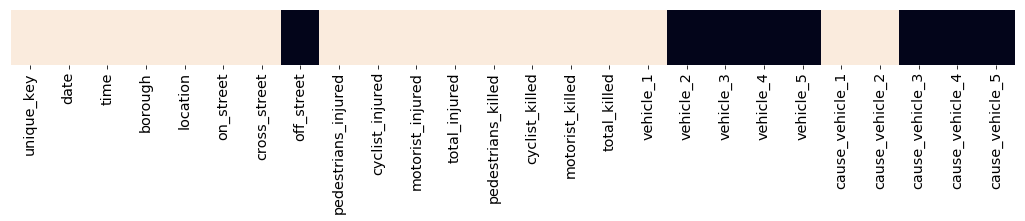

In [495]:
plot_null_matrix(mvc.head(1), figsize=(18,1))

In [496]:
mvc.head(1)

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN


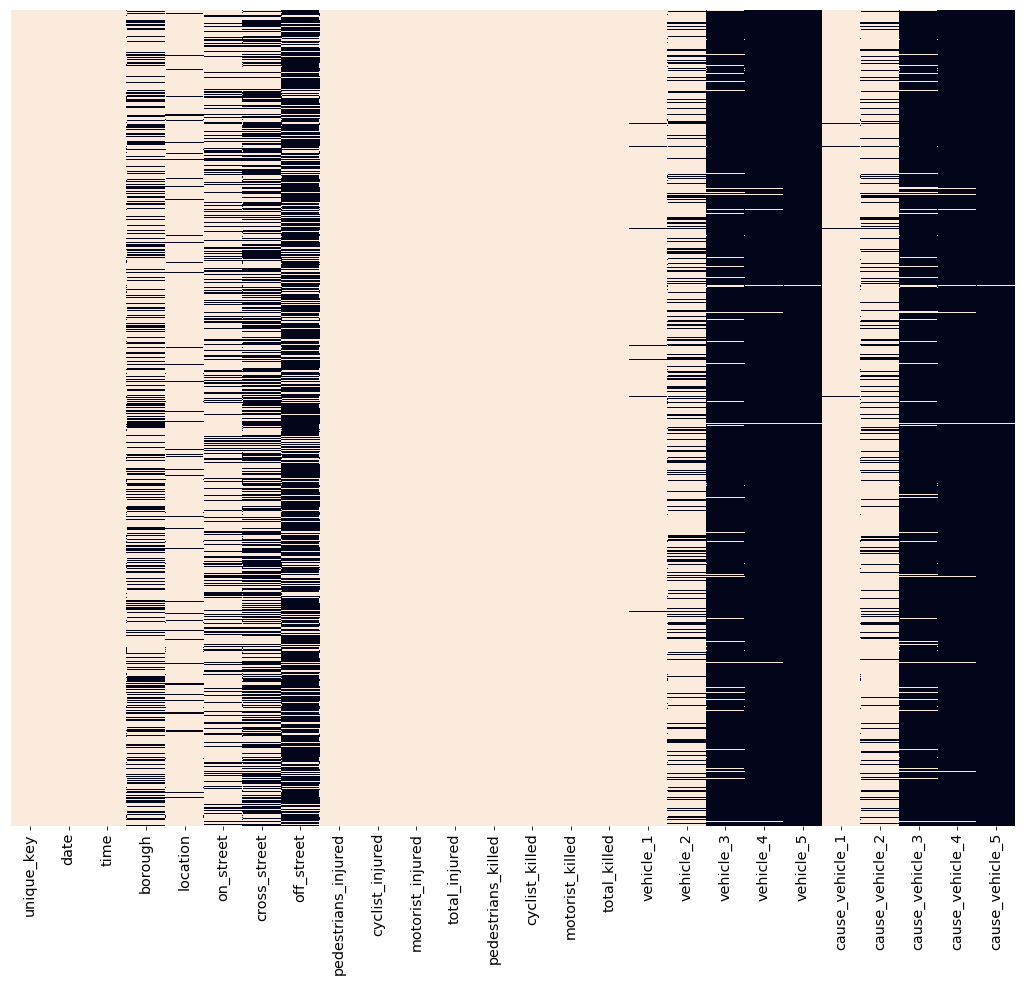

In [498]:
# plotting the entire dataframe we can see some common missing values
plot_null_matrix(mvc)

In [500]:
# getting the correclation of missing values with other columns
cols_with_missing_vals = mvc.columns[mvc.isnull().sum() > 0]
missing_corr = mvc[cols_with_missing_vals].isnull().corr()
missing_corr

,borough,location,on_street,cross_street,off_street,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
borough,1.000000,0.190105,-0.350190,0.409107,0.362189,0.005582,-0.018325,-0.077516,-0.061932,-0.020406,-0.010733,-0.012115,-0.058596,-0.060542,-0.020158,-0.011348
location,0.190105,1.000000,-0.073975,-0.069719,0.084579,0.015496,-0.010466,-0.033842,-0.000927,0.004655,-0.005797,-0.003458,-0.021373,0.000684,0.004604,-0.004841
on_street,-0.350190,-0.073975,1.000000,0.557767,-0.991030,-0.002344,-0.001889,0.119647,0.020867,0.004172,-0.002768,0.001307,0.087374,0.017426,0.002737,-0.003107
cross_street,0.409107,-0.069719,0.557767,1.000000,-0.552763,0.004112,-0.017018,0.043799,-0.049910,-0.021137,-0.012003,-0.009102,0.031189,-0.052159,-0.022074,-0.013455
off_street,0.362189,0.084579,-0.991030,-0.552763,1.000000,0.002323,0.001812,-0.121129,-0.022404,-0.004074,0.002492,-0.001738,-0.088187,-0.019120,-0.002580,0.002863
total_killed,0.005582,0.015496,-0.002344,0.004112,0.002323,1.000000,-0.000327,0.008017,0.001057,0.000462,0.000234,-0.000229,0.009888,0.001091,0.000477,0.000240
vehicle_1,-0.018325,-0.010466,-0.001889,-0.017018,0.001812,-0.000327,1.000000,0.151516,0.019972,0.008732,0.004425,0.604281,0.180678,0.020624,0.009022,0.004545
vehicle_2,-0.077516,-0.033842,0.119647,0.043799,-0.121129,0.008017,0.151516,1.000000,0.131813,0.057631,0.029208,0.106214,0.784402,0.132499,0.058050,0.029264
vehicle_3,-0.061932,-0.000927,0.020867,-0.049910,-0.022404,0.001057,0.019972,0.131813,1.000000,0.437214,0.221585,0.014000,0.106874,0.961316,0.448525,0.225067
vehicle_4,-0.020406,0.004655,0.004172,-0.021137,-0.004074,0.000462,0.008732,0.057631,0.437214,1.000000,0.506810,0.006121,0.046727,0.423394,0.963723,0.515058


# clean correlation plot function

In [514]:
# the transformation below seems to flip the order of the columns
missing_corr = missing_corr.iloc[1:, :-1]
# mask = np.triu(np.ones_like(missing_corr), k=1)

In [501]:
# creating a clean correlation plot
def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a triangular mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()

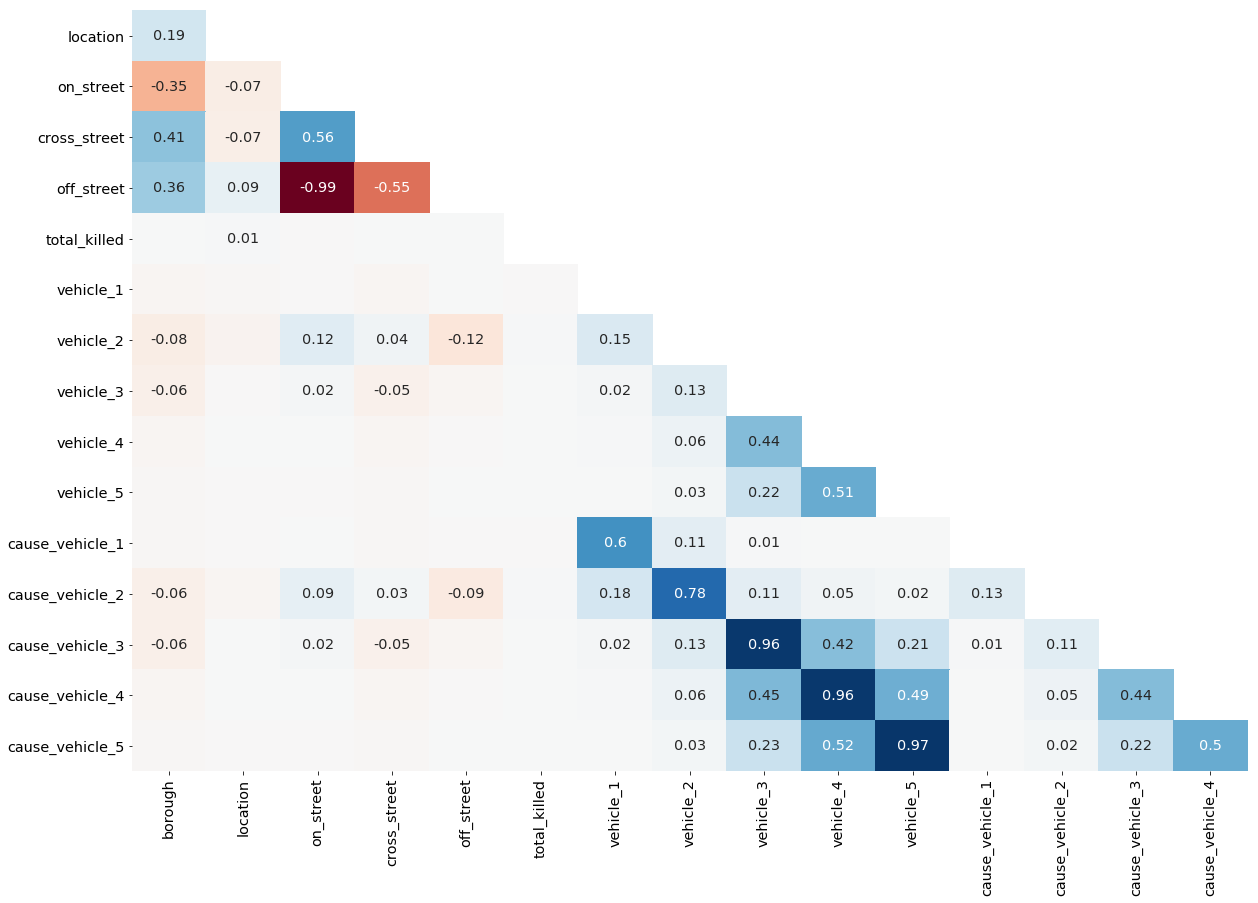

In [502]:
plot_null_correlations(mvc)

In [504]:
# plotting correelations with any column containing 'vehicle'
# first we neeed to create a list of the columns that contain 'vehicle'
veh_list = [col for col in mvc if 'vehicle' in col]

In [505]:
veh_list

['vehicle_1',
 'vehicle_2',
 'vehicle_3',
 'vehicle_4',
 'vehicle_5',
 'cause_vehicle_1',
 'cause_vehicle_2',
 'cause_vehicle_3',
 'cause_vehicle_4',
 'cause_vehicle_5']

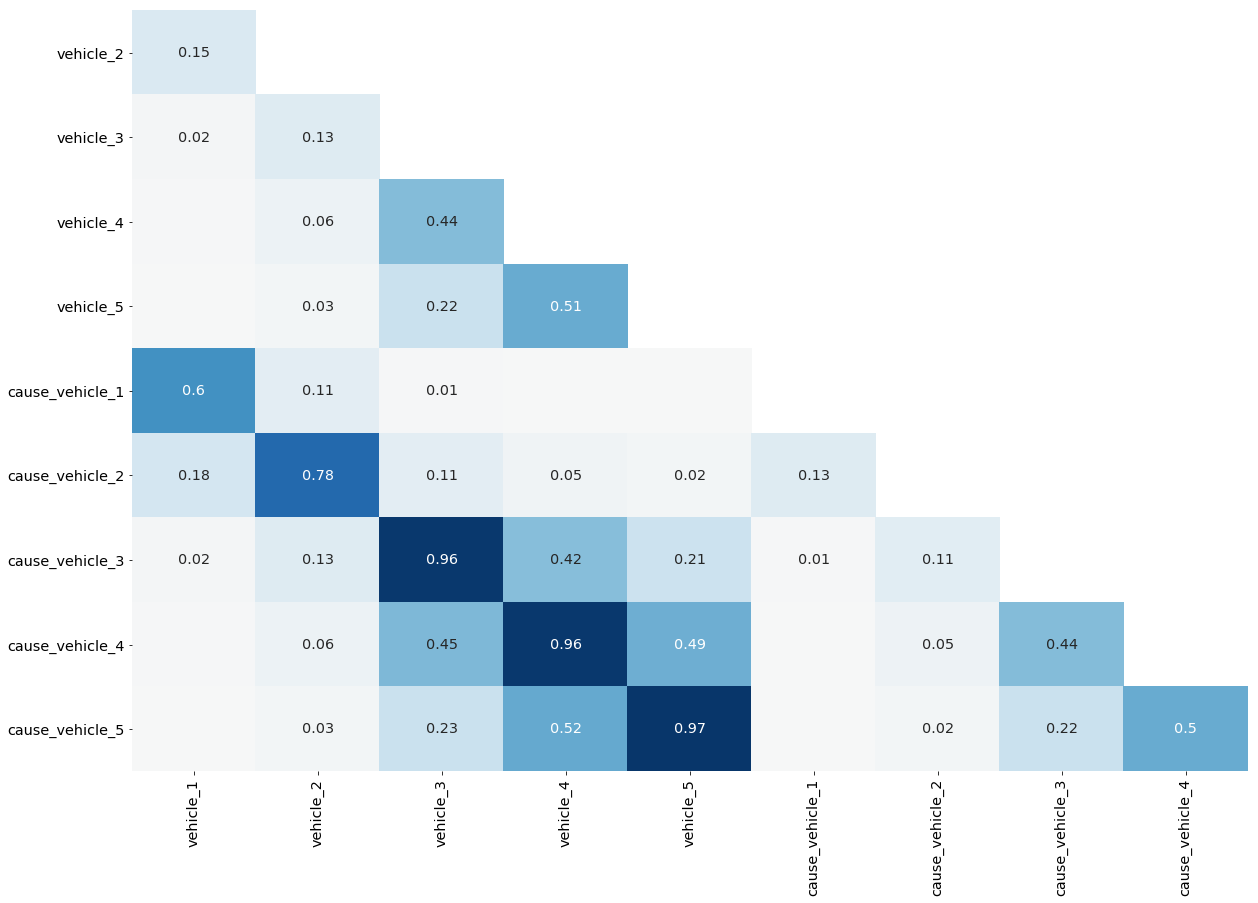

In [508]:
plot_null_correlations(mvc[veh_list])

In [549]:
# examining the points with the highest correlation
# columns we'll use to create a df
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

# empty list we will use to store values
vc_null_data = []

# for loop to extract null value combinations
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[v_col].notnull() & mvc[c_col].isnull()).sum()
    
    vc_null_data.append([v, v_null, c_null])

vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)

In [551]:
# there are about 4500 missing values; dropping all of them would be 
# eliminating about 10% of the dataset
vc_null_df.head()

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [552]:
# we will convert our dataframe to a stack in order to move all columns to one
# we will use the DataFrame.stack()
cause_cols = [c for c in mvc.columns if 'cause' in c]
cause = mvc[cause_cols]
cause.head(2)

,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,Following Too Closely,Unspecified,NaN,NaN,NaN
1,Backing Unsafely,Unspecified,NaN,NaN,NaN


In [553]:
# stacking our dataframe into one column
cause_1d = cause.stack()

In [555]:
# creating a a count of the top 10 reasons
cause_top10 = cause_1d.value_counts().head(10)

In [556]:
cause_top10

Unspecified                       57481
Driver Inattention/Distraction    17650
Following Too Closely              6567
Failure to Yield Right-of-Way      4566
Passing or Lane Usage Improper     3260
Passing Too Closely                3045
Backing Unsafely                   3001
Other Vehicular                    2523
Unsafe Lane Changing               2372
Turning Improperly                 1590
dtype: int64

In [557]:
# I'll do the same for vehicle
# list comprehension to extract columns that start with vehicle
veh_cols = [c for c in mvc.columns if c.startswith('vehicle')]
veh = mvc[veh_cols]
veh.head(2)

,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5
0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
1,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN


In [558]:
# stacking our veh dataframe
veh_1d = veh.stack()
veh_1d.head(2)

0  vehicle_1                PASSENGER VEHICLE
1  vehicle_1    SPORT UTILITY / STATION WAGON
dtype: object

In [560]:
top10_vehicles = veh_1d.value_counts().head(10)
top10_vehicles

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

# replacing null values in this format

1. For values where the vehicle is null and the cause is non-null, set the vehicle to Unspecified.
2. For values where the cause is null and the vehicle is not-null, set the cause to Unspecified.

In [ ]:
# create a mask for each column
v_missing_mask = mvc['vehicle_1'].isnull() & mvc['cause_vehicle_1'].notnull()
c_missing_mask = mvc['cause_vehicle_1'].isnull() & mvc['vehicle_1'].notnull()

# replace the values matching the mask for each column
mvc['vehicle_1'] =  mvc['vehicle_1'].mask(v_missing_mask, "Unspecified")
mvc['cause_vehicle_1'] =  mvc['cause_vehicle_1'].mask(c_missing_mask, "Unspecified")

In [563]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing()
summary_before

,vehicle_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [565]:
# doing the above for all columns with a for loop
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    
    v_missing_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_missing_mask = mvc[c_col].isnull() & mvc[v_col].notnull()

    mvc[v_col] = mvc[v_col].mask(v_missing_mask, "Unspecified")
    mvc[c_col] = mvc[c_col].mask(c_missing_mask, "Unspecified")

summary_after = summarize_missing()
summary_after

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


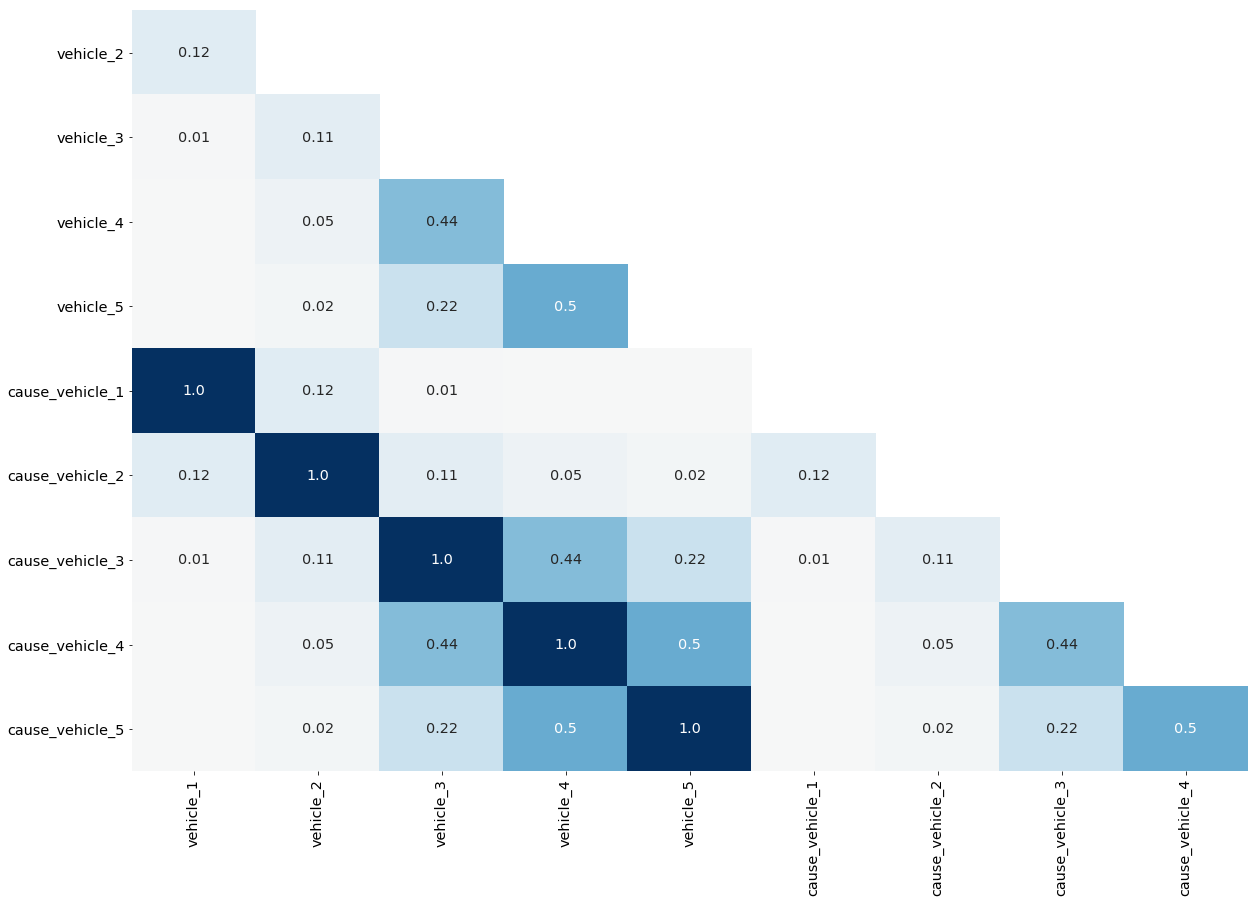

In [567]:
# plotting the updated data to see the updated correlation
veh_cols = [c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc[veh_cols])

In [570]:
# cleaning set of columns that contain missing values (location of accident)
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc[loc_cols]
location_data.head()

,borough,location,on_street,off_street,cross_street
0,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,NaN,10 AVENUE
1,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,NaN,62 STREET
2,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN
3,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,NaN,VANLOON STREET
4,BRONX,"(40.884727, -73.89945)",NaN,208 WEST 238 STREET,NaN


In [572]:
# looking at null values
location_data.isnull().sum()

borough         20646
location         3885
on_street       13961
off_street      44093
cross_street    29249
dtype: int64

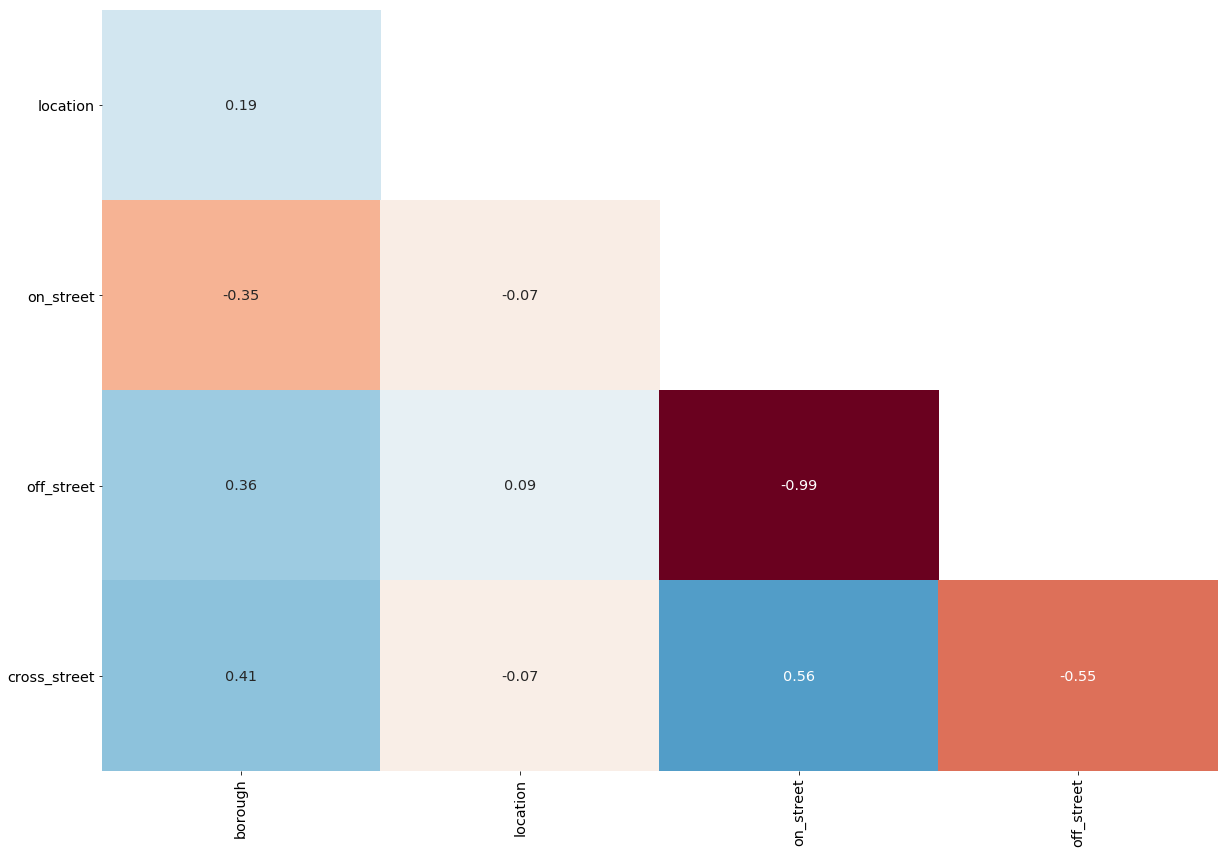

In [575]:
# correlation between missing values
# only off_street and on_street have a strong correlation
plot_null_correlations(location_data)

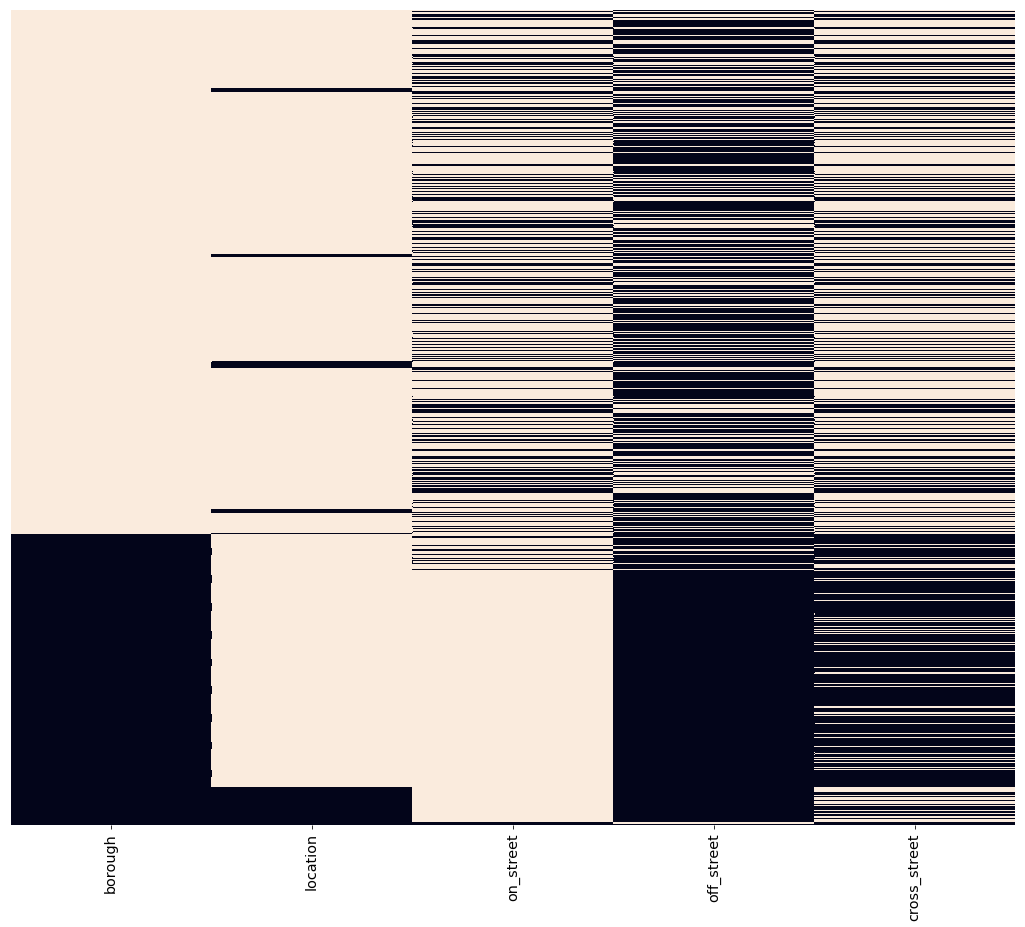

In [576]:
# plotting a null matrix
sorted_location_data = location_data.sort_values(loc_cols)
plot_null_matrix(sorted_location_data)

Missing data observations:

1. About two-thirds of rows have non-null values for borough, but of those values that are missing, most have non-null values for location and one or more of the street name columns.

2. Less than one-tenth of rows have missing values in the location column, but most of these have non-null values in one or more of the street name columns.

3. Most rows have a non-null value for either on_street or off_street, and some also have a value for cross_street.

Supplemnental data was created to fill location data using GeoPy and APIs

1. For rows with location values but missing values in either borough or the street name columns, we used geocoding APIs to look up the location coordinates to find the missing data.

2. For rows with values in the street name columns missing borough and/or location data, we used geocoding APIs to look up the address to find the missing data.

In [577]:
sup_data = pd.read_csv('supplemental_data.csv')
sup_data.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


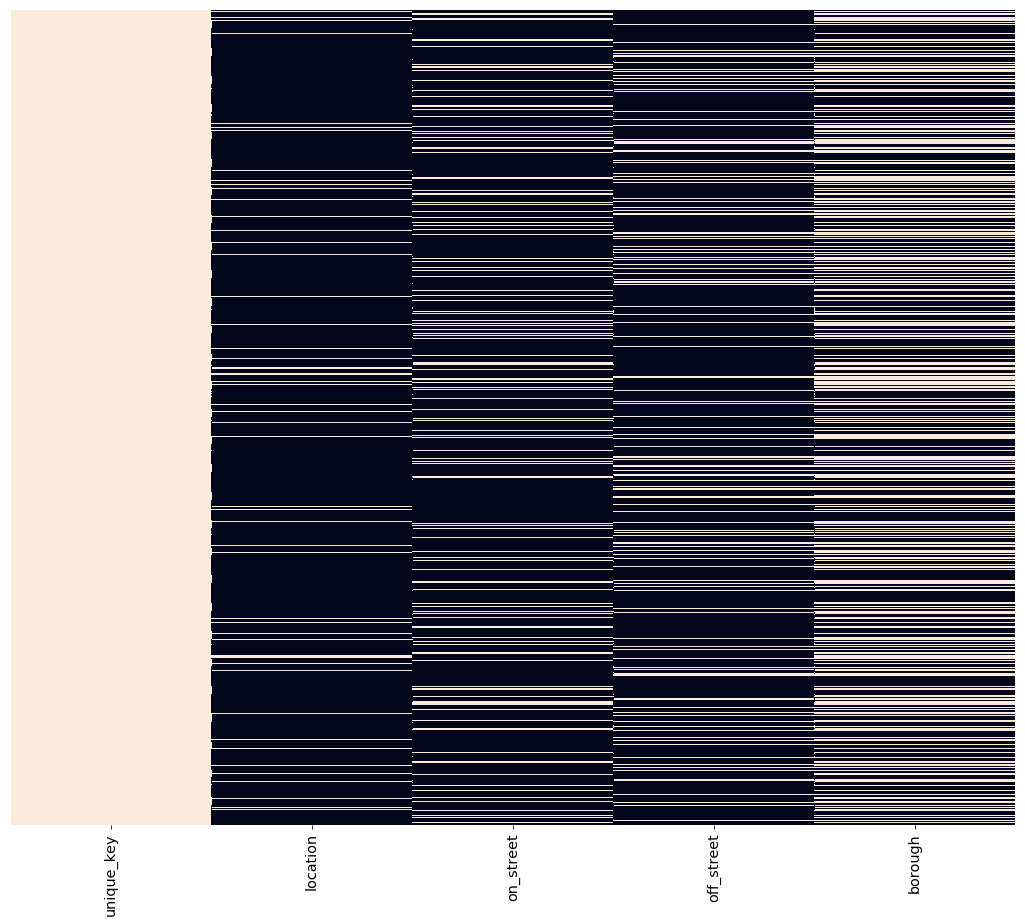

In [578]:
plot_null_matrix(sup_data)

In [580]:
mvc_keys = mvc['unique_key']
sup_keys = sup_data['unique_key']

is_equal = mvc_keys.equals(sup_keys)
is_equal

True

In [582]:
# getting the null values before we replace them with the new location data
location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = mvc[location_cols].isnull().sum()
null_before

location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64

In [583]:
# for loop to replace the null values in the mvc dataset
for col in location_cols:
    mvc[col] = mvc[col].mask(mvc[col].isnull(), sup_data[col]) # replaces nulls with sup_data
    
null_after = mvc[location_cols].isnull().sum()
null_after

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64

### In the steps above we have applied multiple strategies to deal with and replace null values